Este colab fue desarrollado por Arnold Charry Armero

# Glueco Production

Glueco produce tres tipos de pegamento en dos diferentes
líneas de producción. Cada línea puede ser utilizada por hasta siete
trabajadores a la vez. Los trabajadores reciben $\$500$ por semana en
línea de producción 1 y $\$900$ por semana en la línea de producción 2.
Una semana de producción cuesta $\$1000$ para configurar la línea de producción.
1 y $\$2,000$ para montar la línea de producción 2. Durante una semana en una línea de producción, cada trabajador produce la cantidad de unidades
de pegamento que se muestra en la Tabla 12. Cada semana, al menos 120 unidades de
pegamento 1, al menos 150 unidades de pegamento 2 y al menos 200 unidades de pegamento 3 se deben producir. Formule una IP para minimizar el
Costo total de satisfacer las demandas semanales.

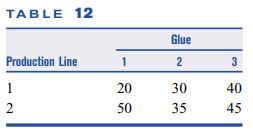

## Conjuntos

$ i = \text{Trabajadores en la línea } i$

$ j = \text{línea de producción } j$

## Parámetros

$ CV_{i} = \textrm{Costo de emplear a un trabajador } i$

$ CF_{i} = \textrm{Costo fijo de colocar la línea de prducción } i $

$ P_{ij} = \textrm{Producción en la línea }j \textrm{ por los trabajadores }i $

$ D_{j} = \textrm{Demanda }j \textrm{ requerida } $

## Variables de decisión

$ x_{i} = \textrm{Cantidad de empleados a contratar } i $

$ y_{i} = \textrm{1 se utiliza la línea de producción } i \textrm{, 0 lo contrario} $

## Función Objetivo

$$ \textrm{Min } z = \sum_{i = 1}^{n} CV_{i}\: x_{i} + \sum_{i = 1}^{n} CF_{i}\: y_{i}$$

## Restricciones

Debe de satisfacerse la demanda,

$$ \sum_{i = 1}^{n} x_{i} P_{ij} \geq D_{j}, \forall j $$

Pueden trabajar hasta 7 trabajadores en cada línea de producción,

$$ x_{i} \leq 7y_{i} $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 26.8 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
trabajadores = range(2)
lineas = range(3)

In [4]:
#Parámetros

CV = [500, 900]

CF = [1000, 2000]

P = [[20, 30, 40],
     [50, 35, 45]]

D = [120, 150, 200]

In [5]:
# Crear la instancia del modelo
model = LpProblem(name="Glueco_Production", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (trabajadores), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (trabajadores), 0, 1, LpInteger)

# Función objetivo
model += lpSum([CV[i] * X[i] for i in trabajadores]) + lpSum([CF[i] * Y[i] for i in trabajadores])


# Agregar las restricciones

for j in lineas:
  model += lpSum([P[i][j] * X[i] for i in trabajadores]) >= D[j]

for i in trabajadores:
  model += X[i] <= 7 * Y[i]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costos totales = $", value(model.objective))

Status: Optimal
X_0 = 6.0
X_1 = 0.0
Y_0 = 1.0
Y_1 = 0.0
Costos totales = $ 4000.0
